In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.family'] = "Arial"
import numpy as np
import matplotlib.pyplot as plt
from facilities import store_object, retrieve_object
from dPCA import dPCA
import pdb
import os
import sys
from sklearn.decomposition import PCA

In [2]:
dirpath = '/home3/ebrahim/multi-area-cleaned/'
loadpath_data = dirpath + 'sims/revision/exemplar_new/scratch_data/'
savepath_figs = dirpath + 'sims/revision/exemplar_new/figs/'
savepath = dirpath + 'sims/revision/exemplar_new/scratch_data/'
modelpath = dirpath + 'examples/models/cb_analyze_fixed-cb.py'

if not os.path.exists(savepath_figs):
    os.makedirs(savepath_figs)

In [3]:
sys.path.append(dirpath)
from pycog.trialRNN import Dynamics

/home3/ebrahim/multi-area-cleaned/pycog/trialRNN.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "/home3/ebrahim/anaconda3/envs/multiarea/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home3/ebrahim/anaconda3/envs/multiarea/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home3/ebrahim/anaconda3/envs/multiarea/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home3/ebrahim/anaconda3/envs/multiarea/lib/python2.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home3/ebrahim/anaconda3/envs/multiarea/lib/python2.7/site-package

In [5]:
rnnbase = dirpath + 'saved_rnns_server_apr/data/2020-04-10_cb_simple_3areas/'
filename_pkl = '2020-04-10_cb_simple_3areas_seed=7.pkl'

vin = 0.1 ** 2 #.1 ** 2 #0.2**2
var_in = np.array(((0, 0, 0, 0), (0,0,0,0), (0,0,vin,0), (0,0,0,vin)))#0.20**2
var_rec = 0.05 ** 2 #.05 ** 2 #0.1**2 #0.05
filename = filename_pkl[:-4]

idx1 = np.hstack((np.arange(80), np.arange(240, 260)))
idx2 = np.hstack((np.arange(80, 160), np.arange(260, 280)))
idx3 = np.hstack((np.arange(160, 240), np.arange(280, 300)))
partition_pca = [idx1, idx2, idx3]
from pycog.trialRNN import Dynamics
dyn = Dynamics(rnnbase + filename_pkl, modelpath, rnnparams={'var_in': var_in, 'var_rec': var_rec}, num_trials=100, seed=1, 
               threshold=0.6, align='cb', partition_pca=partition_pca, onlyCorrect=True, removeCI=True) 
dyn.dims = np.array([0,1])


[ pycog.rnn.RNN ] 16500 updates, best error = 0.20798652, spectral radius = 1.84214282
 Trial 2800/2800: left_right: -1, cond: 11
The proportion of NaN RTs is 0.00535714285714


/home3/ebrahim/multi-area-cleaned/pycog/trialRNN.py:1160: RuntimeWarning: Mean of empty slice
  psth = np.nanmean(p_mtx, axis=0)


('DATA SHAPE AFTER REMOVING CI SIGNAL: ', (300, 9800))


WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named mkl


In [8]:
np.save('pca_data/2020-04-10_cb_simple_3areas_seed=7_data', dyn.data_3d)
np.save('pca_data/2020-04-10_cb_simple_3areas_seed=7_conds', dyn.cond)

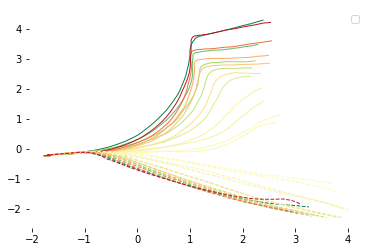

In [36]:
dyn.plot_neural_traj2d_partition_pub(savepath=savepath_figs, filename=filename + '_PC12_remove_CI.pdf', windowStart=70, windowEnd=100, targ_on_label=False, go_cue_label=False)
